# Bernoulli Distribution

\begin{equation*}\begin{cases}\mathbb{P}(X=0)=1-p\\
\mathbb{P}(X=1)=p
\end{cases}\end{equation*}

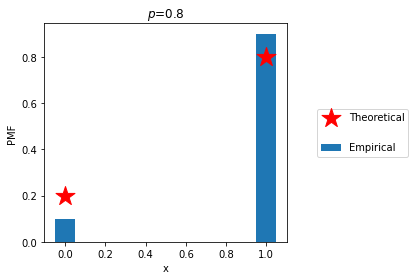

In [ ]:
################################## Bernoulli ##################################

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#set seed or not ...
np.random.seed(19680801)

# parameter for the Bernoulli distribution
p = 0.8 # the success probability 

# parameters for the data sample
nSamples = 10 #number of samples

# generate the sample data; note that Bernoulli is a particular case of Binomial
data = np.random.binomial(1, p, nSamples)

# python specific
fig, ax = plt.subplots()

#generate frequencies = [number of 0's, number of 1's]; this array has length 2 by using bins=2 below
frequencies, bin_edges = np.histogram(data, bins=2)

#construct the corresponding pmf (i.e., normalize the frequencies by the number of data points)
pmf = frequencies / nSamples

# plot the empirical PMF
ax.bar([0,1], pmf, width = 0.1, label='Empirical',zorder=1)

# plot the theoretical PMF
ax.scatter([0,1], [1-p,p], marker="*", color='r', s=400, label='Theoretical',zorder=2)

#set axes
ax.set_xlabel('x')
ax.set_ylabel('PMF')
ax.set_title(r'$p$='+str(p))
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=2)

# python specific
fig.tight_layout()

## Exercises (Bernoulli)
1.   Run the code above twice with the line "np.random.seed(19680801)" and twice without; what do you observe?
2.   The Theoretical and Empirical PMFs are quite far apart :( Fix that by a (very) simple change in the code!



# Binomial Distribution

\begin{equation*}
P(X=k)=\binom{N}{k}p^k(1-p)^{N-k}~\forall k=0,1,\dots,N\end{equation*}


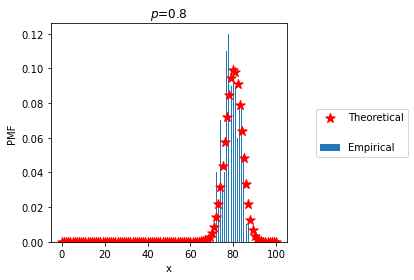

In [3]:
################################## Binomial ##################################

import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats 
import scipy

#set seed or not ...
np.random.seed(19680801)

# parameters for the Binomial distribution
N = 100 # number of experiments
p = 0.8 # the success probability 

# parameters for the data sample
nSamples = 100 #number of samples

# generate the sample data; note that Bernoulli is a particular case of Binomial
data = np.random.binomial(N, p, nSamples)

# python specific
fig, ax = plt.subplots()

#generate frequencies = [number of 0's, number of 1's, ..., number of N's]; this array has length N+1 (values of the distribution) by using bins=N+1 below
frequencies, bin_edges = np.histogram(data, bins=N+1, range=(0,N+1))

#construct the corresponding pmf (i.e., normalize the frequencies by the number of data points)
pmf = frequencies / nSamples

# plot the empirical PMF
x= list(range(N+1)) #the points [0,1,...,N] on the x axis
ax.bar(x, pmf, width = 0.5, label='Empirical',zorder=1)

#compute the theoretical pmf
for k in x:
  pmf[k] = scipy.special.comb(N,k) * pow(p,k) * pow(1-p,N-k)
#... and plo it
ax.scatter(x, pmf, marker="*", color='r', s=100, label='Theoretical',zorder=2)

#set axes
ax.set_xlabel('x')
ax.set_ylabel('PMF')
ax.set_title(r'$p$='+str(p))
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=2)

# python specific
fig.tight_layout()

## Exercises (Binomial)
1.   There is quite a large discrepancy between the empirical and theoretical pmfs despite using 100 samples; is there a bug in the code?
2.   Implement a theoretical Poisson pmf and check when the Binomial gets close to the Poisson






# Uniform Distribution

\begin{equation*}f(x)=\begin{cases}\frac{1}{b-a}~\forall x\in [a,b]\\
0~\textrm{otherwise}
\end{cases}\end{equation*}


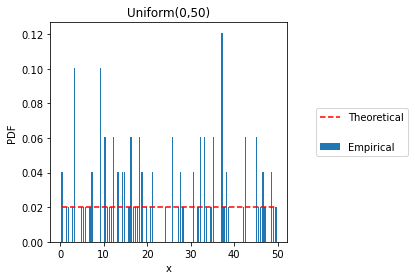

In [ ]:
################################### Uniform ####################################
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#set seed or not ...
#np.random.seed(19680801)

# parameters for the (uniform) distribution
a = 0  # left
b = 50  # righ 

# parameters for the data sample
nSamples = 100
nBins = 5 #number of bins (equally spaced intervals on the x-axis; each data point will fall into a single bin)

# generate the data
data = np.random.uniform(a, b, nSamples) #generates nSamples according to the Uniform distribution

# python specific
fig, ax = plt.subplots()

#generate frequencies in each of the nBins
frequencies, edges = np.histogram(data, nBins)

# simple example: if nBins = 2 then edges is the array: [x1,x2,x3]; frequency[1] is the number of data values in [x1, x2) and frequency[2] is the the number of data values in [x2,x3]; 
# note that x3-x2=x2-x1 (e.g., the bin edges are equally spaced, unless forced otherwise); x1 is the min value; x3 is the max value

#construct the corresponding empirical pmdf (i.e., normalize the frequencies by the number of data points)
pmf = frequencies / nSamples

#the x values corresponding to the pmf values
centers=0.5*(edges[:-1]+edges[1:])
#for the simple example above, centers = [(x1+x2)/2, (x2+x3)/2]

# plot the empirical PMF (in the case of real data we always plot a (discrete) PMF as opposed to a (continuous) PDF)
ax.bar(centers, pmf/(centers[1]-centers[0]), width = 0.3, label='Empirical',zorder=1)
# here, a normalization is needed (so that the area = 1); 
# although sum(pmf)=1, each bar in the plot corresponds not to a single (infinitesimal) point on the x axis but to an interval of length centers[i]-centers[i-1]
# therefore, for the purpose that the sum of all the areas of the bars = 1 the normalization is needed

# the theoretical PDF (corresponding to the given/known parameters)
y = np.empty(nBins)
y.fill(1/(b-a))
# plot the theoretical PDF
ax.plot(centers, y, '--', color='r', label='Theoretical',zorder=2)

#set axes
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.set_title(r'Uniform('+str(a)+','+str(b)+')')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=2)

# python specific
fig.tight_layout()

## Exercises (Uniform)

1.   Run the code with various values of nBins (# of bins); what do you observe?
2.   What's the fundamental difference in using the bins (in the call "np.histogram(...)") for the Binomial vs the Uniform (and the Normal below)?
3.   Run the code for the case when nBins > b - a (say a=0, b=50, nBins=5); what do you observe?

# Normal Distribution

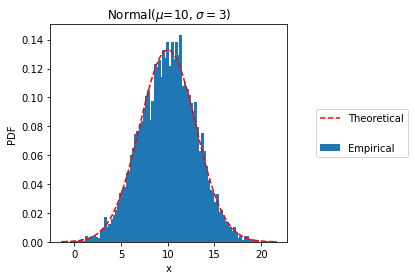

In [ ]:
################################### Normal ####################################
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#set seed or not ...
#np.random.seed(19680801)

# parameters for the (normal) distribution
mu = 10  # mean 
sigma = 3  # standard deviation 

# parameters for the data sample
nSamples = 10000
nBins = 100 #number of bins (equally spaced intervals on the x-axis; each data point will fall into a single bin)

# generate the data
data = mu + sigma * np.random.randn(nSamples) #randn generates a standard N(0,1) normal; needs the scaling with sigma and mu 

# python specific
fig, ax = plt.subplots()

#generate frequencies in each of the nBins
frequencies, edges = np.histogram(data, nBins)
# simple example: if nBins = 2 then edges is the array: [x1,x2,x3]; frequency[1] is the number of data values in [x1, x2) and frequency[2] is the the number of data values in [x2,x3]; 
# note that x3-x2=x2-x1 (e.g., the bin edges are equally spaced, unless forced otherwise); x1 is the min value; x3 is the max value

#construct the corresponding empirical pmdf (i.e., normalize the frequencies by the number of data points)
pmf = frequencies / nSamples

#the x values corresponding to the pmf values
centers=0.5*(edges[:-1]+edges[1:])
#for the simple example above, centers = [(x1+x2)/2, (x2+x3)/2]

# plot the empirical PMF
ax.bar(centers, pmf/(centers[1]-centers[0]), width = 0.3, label='Empirical',zorder=1)
# here, a normalization is needed (so that the area = 1); 
# although sum(pmf)=1, each bar in the plot corresponds not to a single (infinitesimal) point on the x axis but to an interval of length centers[i]-centers[i-1]
# therefore, for the purpose that the sum of all the areas of the bars = 1 the normalization is needed

# the theoretical density (corresponding to the given/known parameters)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (centers - mu))**2))
# plot the theoretical pdf
ax.plot(centers, y, '--', color='r', label='Theoretical',zorder=2)

#set axes
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.set_title(r'Normal(''$\mu$='+str(mu)+', $\sigma=$'+str(sigma)+')')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=2)

# python specific
fig.tight_layout()

# Pareto Distribution

$$F(x)=\mathbb{P}(X\leq x)=\begin{cases} 1-\left(\frac{x_{\textrm{m}}}{x}\right)^{\alpha},& x\geq x_{\textrm{m}}\\ 0,&\textrm{otherwise}\end{cases}$$

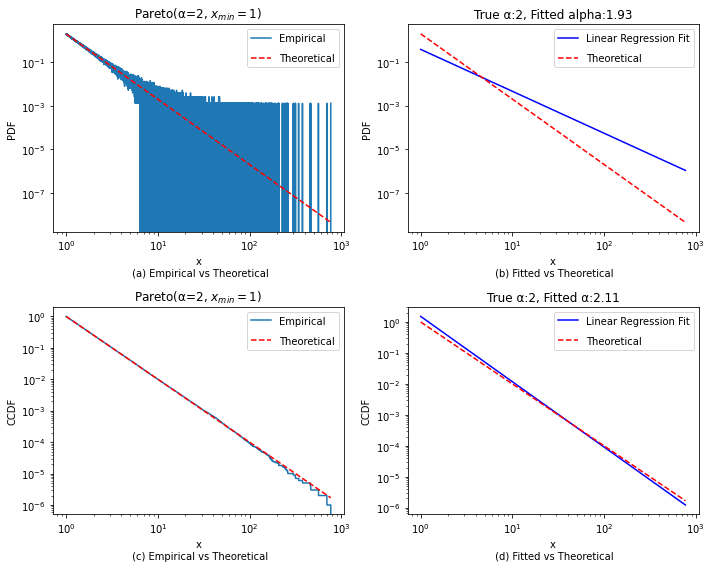

In [ ]:
################################### Pareto ####################################
import matplotlib
import numpy as np
import math
import matplotlib.pyplot as plt

#set seed or not ...
#np.random.seed(19680801)

# parameters for the (pareto) distribution
alpha = 2  # shape 
xmin = 1  # scale 

# parameters for the data sample
nSamples = 1000000
nBins = math.ceil(nSamples) #number of bins (equally spaced intervals on the x-axis; each data point will fall into a single bin)
#nBins = 1000000

# generate the data
data = (np.random.pareto(alpha, nSamples) + 1) * xmin

# python specific
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(10,8)) 

# ax1 and ax2 are subplots
# set the plots on a log/log scale
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax4.set_xscale('log')
ax4.set_yscale('log')

#generate frequencies in each of the nBins
frequencies, edges = np.histogram(data, nBins) 
#the x values corresponding to each bin 
x=0.5*(edges[:-1]+edges[1:])

#construct the corresponding empirical PDF (i.e., normalize the frequencies by the number of data points)
epdf = frequencies / nSamples
epdf = epdf/(x[1]-x[0]) #see above ... so that the area = 1
# plot it
ax1.plot(x, epdf, '-', label='Empirical',zorder=1)

# the theoretical density (corresponding to the given/known parameters)
tpdf = alpha * (xmin ** alpha) / (x ** (alpha + 1))
# plot it
ax1.plot(x, tpdf, '--', color='r', label='Theoretical',zorder=2)

#set axes
ax1.set_xlabel('x\n (a) Empirical vs Theoretical')
ax1.set_ylabel('PDF')
ax1.set_title(r'Pareto(α='+str(alpha)+', $x_{min}=$'+str(xmin)+')')
ax1.legend(loc=1,  labelspacing=1)

## FIT a Linear Line to the Empirical PDF

#rescale everything to log10 (to fit the presumable "line")
xx=np.empty(np.count_nonzero(epdf))#only look at the non-empty bins
yy=np.empty(np.count_nonzero(epdf))
i = -1
for k in range(len(x)):
  if(epdf[k] != 0): #ignore this empty bin
    i = i + 1
    xx[i] = math.log10(x[k])
    yy[i] = math.log10(epdf[k])

#fit a linear line (coef[0]*x + coef[1] to minimize the sum of squared errors between xx and yy)
coef = np.polyfit(xx,yy,1)
#rescale this line so that when printed on the log-log scale appears as a line
yfit = (10**coef[1])*(x**coef[0])
# note that log(yfit) = coef[1] + coef[0] * log(x)
# ... and now print this linear fit
ax2.plot(x, yfit, '-', color='b', label='Linear Regression Fit',zorder=1)
# and the theoretical one
ax2.plot(x, tpdf, '--', color='r', label='Theoretical',zorder=2)

ax2.set_xlabel('x\n (b) Fitted vs Theoretical')
ax2.set_ylabel('PDF')
ax2.set_title(r'True α:'+str(alpha)+', Fitted alpha:'+str(round(-coef[0],2)))
ax2.legend(loc=1,  labelspacing=1)


######################## DO THE SAME FOR THE CDF
# compute the empirical CCDF
eccdf = 1 - frequencies.cumsum() / nSamples
ax3.plot(x, eccdf, '-', label='Empirical',zorder=1)

# the theoretical CCDF 
tccdf = (xmin / x) ** alpha
ax3.plot(x, tccdf, '--', color='r', label='Theoretical',zorder=2)

ax3.set_xlabel('x\n (c) Empirical vs Theoretical')
ax3.set_ylabel('CCDF')
ax3.set_title(r'Pareto(α='+str(alpha)+', $x_{min}=$'+str(xmin)+')')
ax3.legend(loc=1,  labelspacing=1)

## FIT a Linear Line to the Empirical CCDF

#rescale everything to log10 (to fit the presumable "line")
x3=np.empty(len(eccdf)-1)
y3=np.empty(len(eccdf)-1)
for k in range(len(eccdf)-1):
    x3[k] = math.log10(x[k])
    y3[k] = math.log10(eccdf[k])

#fit a linear line (coef[0]*x + coef[1] to minimize the sum of squared errors between xx and yy)
coef = np.polyfit(x3,y3,1)
#rescale this line so that when printed on the log-log scale appears as a line
yfit = (10**coef[1])*(x**coef[0])
# note that log(yfit) = coef[1] + coef[0] * log(x)
# ... and now print this linear fit
ax4.plot(x, yfit, '-', color='b', label='Linear Regression Fit',zorder=1)
# and the theoretical one
ax4.plot(x, tccdf, '--', color='r', label='Theoretical',zorder=2)

ax4.set_xlabel('x\n (d) Fitted vs Theoretical')
ax4.set_ylabel('CCDF')
ax4.set_title(r'True α:'+str(alpha)+', Fitted α:'+str(round(-coef[0],2)))
ax4.legend(loc=1,  labelspacing=1)


# python specific
plt.tight_layout()

## Exercises

(a) and (b) are about the PDF

The empirical PDF plot (a) looks very weird in the tail; the reason is that a lot of large values never happen (the empirical pdf at those points is 0), but some large values do happen; the visual brushing effect is due to the alternation between 0 and roughly $10^{-Number Of Samples}$.

(c) and (d) are about the CCDF, and are roughly obtained alike (a) and (b). 

1.   Run the code with various values of Number-Of-Samples and Number-of-Bins to see how unstable the data is
2.   Understand how the plot (b) was generated
3.   Why is the fitted alpha from (d) much better than the fitted alpha from (b)?

